### Name: Akshata Katole and Ananya Raut
### Section: A
### Roll No.: 2 and 3



---



#### Aim: Construct a DAG with visualization and find the minimum number of registers using labelling algorithm.

In [56]:
import re
import networkx as nx
import matplotlib.pyplot as plt

In [57]:
def generate_tac(expression):
    tokens = re.findall(r'[a-zA-Z]+|[0-9]+|[-+*/()]', expression)
    precedence = {'+': 1, '-': 1, '*': 2, '/': 2}

    temp_count = 1
    stack = []
    output = []
    tac = []
    temp_vars = {}

    for token in tokens:
        if token.isalnum():
            output.append(token)
        elif token in precedence:
            while (stack and stack[-1] != '(' and precedence[stack[-1]] >= precedence[token]):
                output.append(stack.pop())
            stack.append(token)
        elif token == '(':
            stack.append(token)
        elif token == ')':
            while stack and stack[-1] != '(':
                output.append(stack.pop())
            stack.pop()

    while stack:
        output.append(stack.pop())

    stack = []
    for token in output:
        if token.isalnum():
            stack.append(token)
        else:
            op2 = stack.pop()
            op1 = stack.pop()
            temp_var = f'T{temp_count}'
            tac.append(f'{temp_var} = {op1} {token} {op2}')
            stack.append(temp_var)
            temp_vars[temp_var] = (op1, token, op2)
            temp_count += 1

    result_var = stack.pop()
    tac.append(f'Z = {result_var}')
    return tac, temp_vars

In [58]:
def create_dag(temp_vars):
    G = nx.DiGraph()
    node_map = {}

    for var, (op1, operator, op2) in temp_vars.items():
        if (op1, operator, op2) in node_map:
            node_map[var] = node_map[(op1, operator, op2)]
        else:
            G.add_node(var, label=f'{operator}')
            node_map[(op1, operator, op2)] = var
            for operand in (op1, op2):
                G.add_edge(operand, var)

    G.add_node('Z', label='Z')
    last_temp = list(temp_vars.keys())[-1]
    G.add_edge(last_temp, 'Z')

    return G

In [59]:
def draw_dag(G):
    pos = nx.nx_pydot.graphviz_layout(G, prog='dot')
    labels = nx.get_node_attributes(G, 'label')

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2500, font_size=12, edge_color='gray')
    nx.draw_networkx_labels(G, {k: (v[0], v[1] - 10) for k, v in pos.items()}, labels, font_size=12, font_color='black')

    plt.title("DAG Representation of Three Address Code (Tree Structure)")
    plt.show()

In [60]:
def register_allocation(G):
    labels = {}
    for node in nx.topological_sort(G):
        preds = list(G.predecessors(node))
        if len(preds) == 0:
            labels[node] = 1 if len(labels) % 2 == 0 else 0
        elif len(preds) == 1:
            labels[node] = labels[preds[0]]
        else:
            left, right = labels[preds[0]], labels[preds[1]]
            labels[node] = left + 1 if left == right else max(left, right)

    min_registers = max(labels.values()) if labels else 0
    return min_registers

In [61]:
expression = "Z = X - Y + X * Y * U - V / W + X + V"
tac_code, temp_vars = generate_tac(expression[4:])

print("Three Address Code:")
for line in tac_code:
    print(line)

Three Address Code:
T1 = X - Y
T2 = X * Y
T3 = T2 * U
T4 = T1 + T3
T5 = V / W
T6 = T4 - T5
T7 = T6 + X
T8 = T7 + V
Z = T8


DAG Representation:



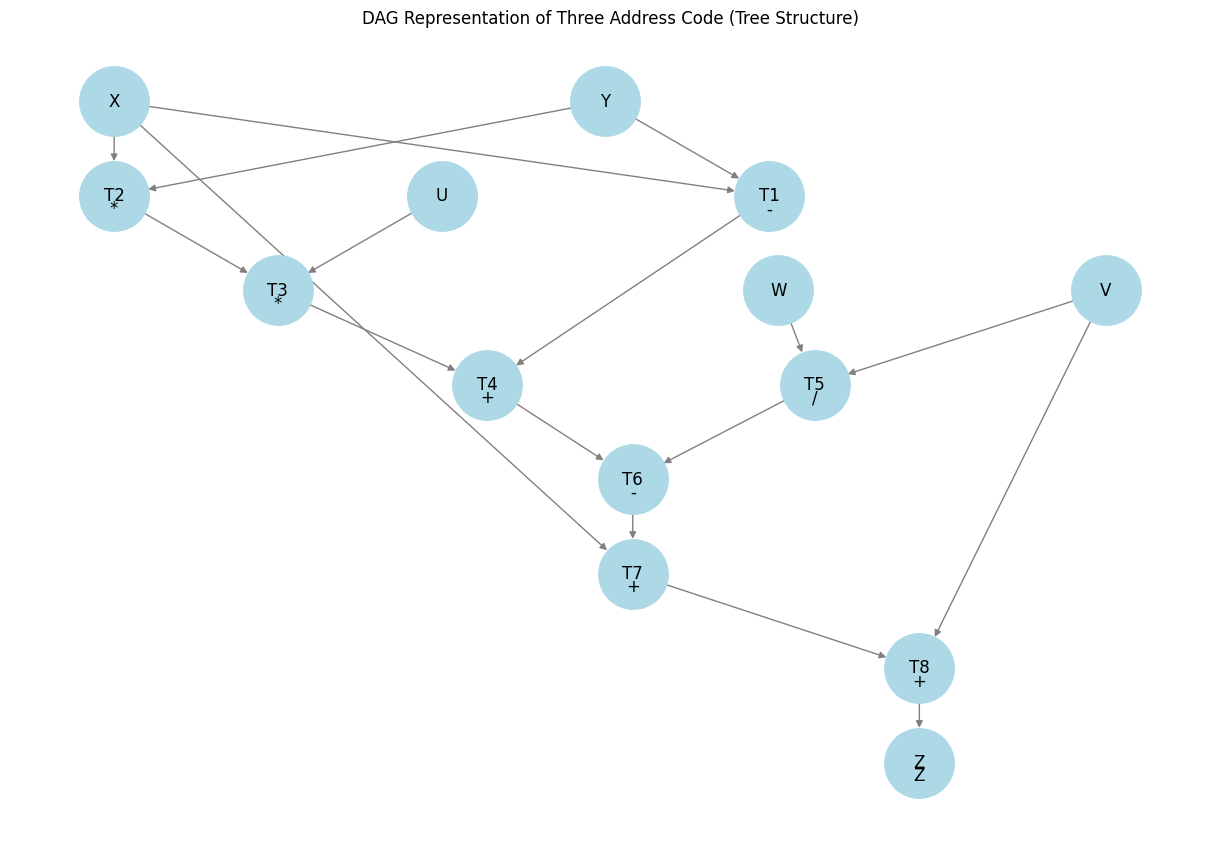

In [64]:
G = create_dag(temp_vars)
print("DAG Representation:\n")
draw_dag(G)

In [65]:
min_registers = register_allocation(G)
print(f"Minimum number of registers required: {min_registers}")

Minimum number of registers required: 2
